# Build a Dashboard Application with Plotly Dash


<p>
In this lab, you will be building a Plotly Dash application for users to perform interactive visual analytics on SpaceX launch data in
real-time.
</p>

<p>
This dashboard application contains input components such as a dropdown list and a range slider to
interact with a pie chart and a scatter point chart. You will be guided to build this dashboard application via the following tasks:
    </p>

* TASK 1: Add a Launch Site Drop-down Input Component
* TASK 2: Add a callback function to render success-pie-chart based on selected site dropdown
* TASK 3: Add a Range Slider to Select Payload
* TASK 4: Add a callback function to render the success-payload-scatter-chart scatter plot

<em><strong>
Note:Please take screenshots of the Dashboard and save them. Further upload your notebook to github.
<br>
The github url and the screenshots are later required in the presentation slides.
</strong></em>

Your completed dashboard application should look like the following screenshot:

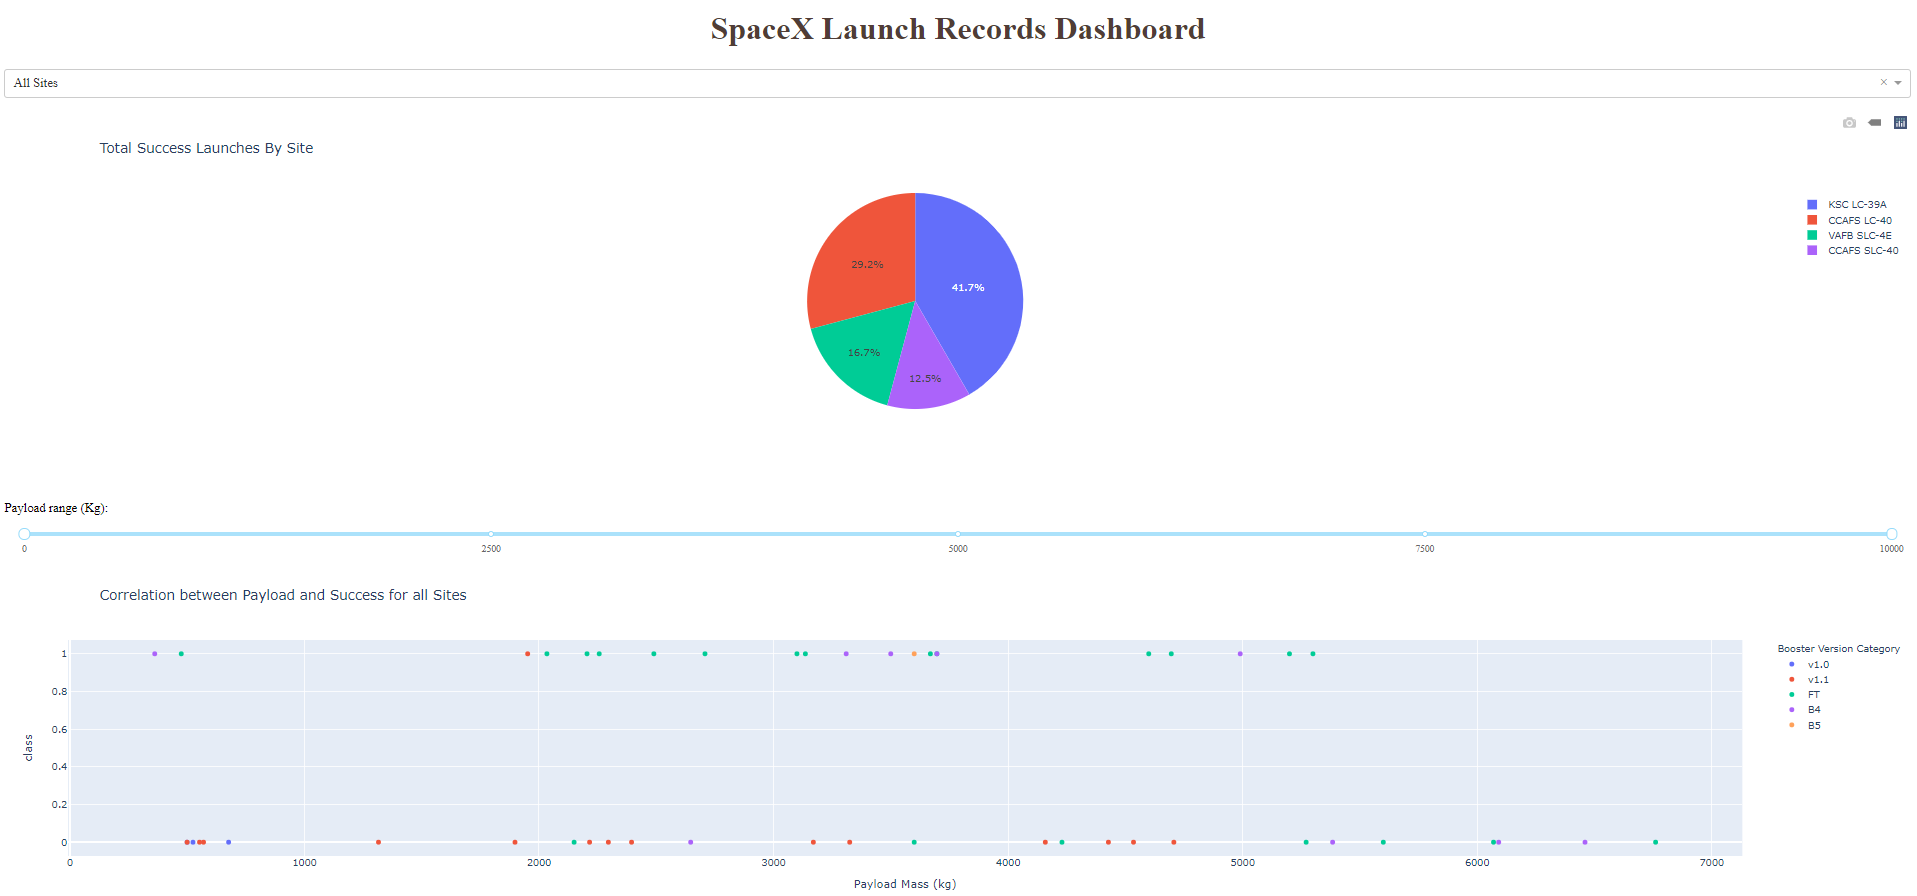

After visual analysis using the dashboard, you should be able to obtain some insights to answer the following five questions:

<ol>
  <li>Which site has the largest successful launches? </li>
  <li>Which site has the highest launch success rate?</li>
  <li>Which payload range(s) has the highest launch success rate?</li>
  <li>Which payload range(s) has the lowest launch success rate?</li>
  <li>Which F9 Booster version (v1.0, v1.1, FT, B4, B5, etc.) has the highest
launch success rate? </li>
</ol>







## Install required Python packages

In [1]:
!pip3 install pandas dash
!pip3 install wget

In [2]:
import wget
import pandas as pd

## Download a skeleton dashboard application and dataset

First, let’s get the SpaceX Launch dataset for this lab:

In [3]:
# wget "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_dash.csv"

spacex_csv_file = wget.download('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_dash.csv')
spacex_df=pd.read_csv(spacex_csv_file)

spacex_df.shape
#

(56, 7)

Download a skeleton Dash app to be completed in this lab:

In [4]:
# wget "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/spacex_dash_app.py"

Test the skeleton app by running the following command in the terminal:

In [13]:
# python3.8 spacex_dash_app.py

In [13]:
# Import required libraries
import pandas as pd
import dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output

import plotly.express as px

# Read the airline data into pandas dataframe
# spacex_df = pd.read_csv("spacex_launch_dash.csv")
max_payload = spacex_df['Payload Mass (kg)'].max()
min_payload = spacex_df['Payload Mass (kg)'].min()

# Create a dash application
app = dash.Dash(__name__)

# Create an app layout
app.layout = html.Div(children=[html.H1('SpaceX Launch Records Dashboard',
                                        style={'textAlign': 'center', 'color': '#503D36',
                                               'font-size': 40}),
                                # TASK 1: Add a dropdown list to enable Launch Site selection
                                # The default select value is for ALL sites
                                # dcc.Dropdown(id='site-dropdown',...)
                                html.Br(),

                                # TASK 2: Add a pie chart to show the total successful launches count for all sites
                                # If a specific launch site was selected, show the Success vs. Failed counts for the site
                                html.Div(dcc.Graph(id='success-pie-chart')),
                                html.Br(),

                                html.P("Payload range (Kg):"),
                                # TASK 3: Add a slider to select payload range
                                #dcc.RangeSlider(id='payload-slider',...)

                                # TASK 4: Add a scatter chart to show the correlation between payload and launch success
                                html.Div(dcc.Graph(id='success-payload-scatter-chart')),
                                ])

# TASK 2:
# Add a callback function for `site-dropdown` as input, `success-pie-chart` as output

# TASK 4:
# Add a callback function for `site-dropdown` and `payload-slider` as inputs, `success-payload-scatter-chart` as output


# Run the app
if __name__ == '__main__':
    #app.run_server()
    app.run_server()

*	Observe the port number (8050) shown in the terminal.
*	In the left Navigation Pane click on Others and click Launch Application option under it.Enter the application port number as 8050.
Click Your Application.
*	You should see a nearly blank web page indicating a successfully running dash app.
<br>

Next, let’s fill the skeleton app with required input/output components and callback functions.
If you need to refresh your memory about Plotly Dash components and callback functions, you may refer to the lab you have learned before:
[Plotly Dash Lab](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%204/4.7_Dash_Interactivity.py)


## TASK 1: Add a Launch Site Drop-down Input Component

We have four different launch sites and we would like to first see which one has the largest success count. 
<br>
Then,
we would like to select one specific site and check its detailed success rate (class=0 vs. class=1). <br>

As such, we will need a dropdown menu to let us select different launch sites.

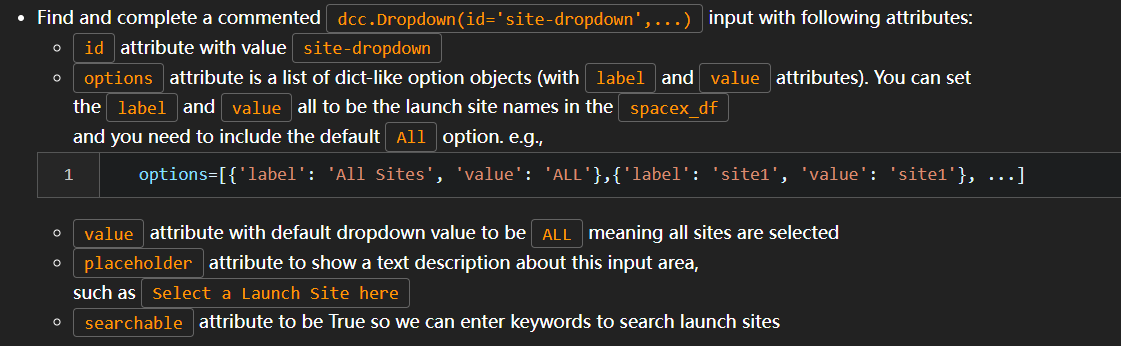

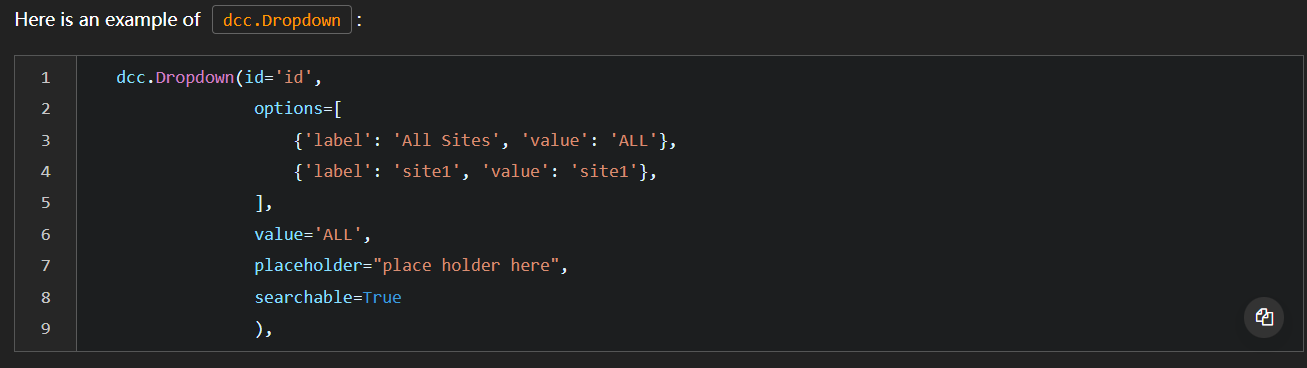

If you need more help about Dropdown(), refer to the Plotly Dash Reference section towards
the end of this lab. <br>

Your completed dropdown menu should look like the following screenshot:

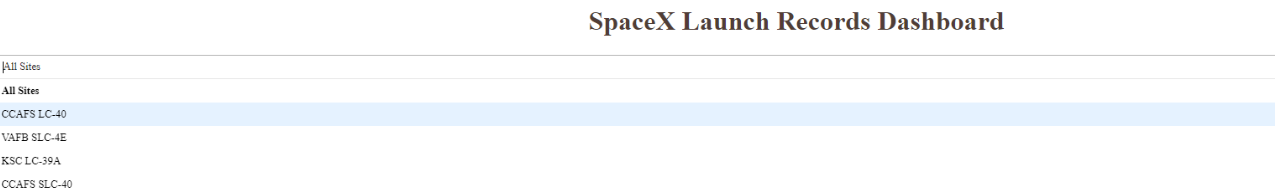

In [5]:
launch_sites_df = spacex_df.groupby(['Launch Site'], as_index=False).first()
sites = list(launch_sites_df['Launch Site'])
allsites =['All Sites']
sites_opt = allsites + sites
type(sites_opt)

list

In [18]:
from dash import callback
import plotly.express as px


In [19]:
# Create a dash application
app = dash.Dash(__name__)

# Create an app layout
app.layout = html.Div(children=[html.H1('SpaceX Launch Records Dashboard',
                                        style={'textAlign': 'center', 'color': '#503D36',
                                               'font-size': 40}),
                                # TASK 1: Add a dropdown list to enable Launch Site selection
                                # The default select value is for ALL sites
                                # dcc.Dropdown(id='site-dropdown',...)
                                html.Div([
                                        # Create an division for adding dropdown helper text for report type
                                        html.Div(
                                                  [
                                                  html.H2('Launch Site:', style={'margin-right': '2em'}),
                                                  ]
                                                ),
                                        # Add a dropdown
                                        dcc.Dropdown(id='site-dropdown', 
                                                     options = sites_opt, 
                                                     placeholder='All Sites',
                                                     style={'textAlign': 'center', 'color': '#000000', 'font-size': 20, 'width':'80%', 'padding':'3px'}
                                                     )
                                         # Place them next to each other using the division style
                                            ], style={'display':'flex'}),

                                html.Div(id='dd-output-container'),
                                html.Br(),

                                # TASK 2: Add a pie chart to show the total successful launches count for all sites
                                # If a specific launch site was selected, show the Success vs. Failed counts for the site
                                html.Div(dcc.Graph(id='success-pie-chart')),
                                html.Br(),

                                html.P("Payload range (Kg):"),
                                # TASK 3: Add a slider to select payload range
                                #dcc.RangeSlider(id='payload-slider',...)

                                # TASK 4: Add a scatter chart to show the correlation between payload and launch success
                                html.Div(dcc.Graph(id='success-payload-scatter-chart')),
                                ])

# TASK 2:
# Add a callback function for `site-dropdown` as input, `success-pie-chart` as output

# TASK 4:
# Add a callback function for `site-dropdown` and `payload-slider` as inputs, `success-payload-scatter-chart` as output


@callback(
    Output('dd-output-container', 'children'),
    Input('site-dropdown', 'value')
)
def update_output(value):
    return f'You have selected {value}'

# Run the app
if __name__ == '__main__':
    app.run_server()

## TASK 2: Add a callback function to render 'success-pie-chart' based on selected site dropdown

The general idea of this callback function is to get the selected launch site from site-dropdown and render
a pie chart visualizing launch success counts.
Dash callback function is a type of Python function which will be automatically called by Dash whenever receiving an input component updates, such as a click or dropdown selecting event.
<br>

If you need to refresh your memory about Plotly Dash callback functions, you may refer to the lab you have learned before:
[Plotly Dash Lab](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module4/4.7_Dash_Interactivity.py)



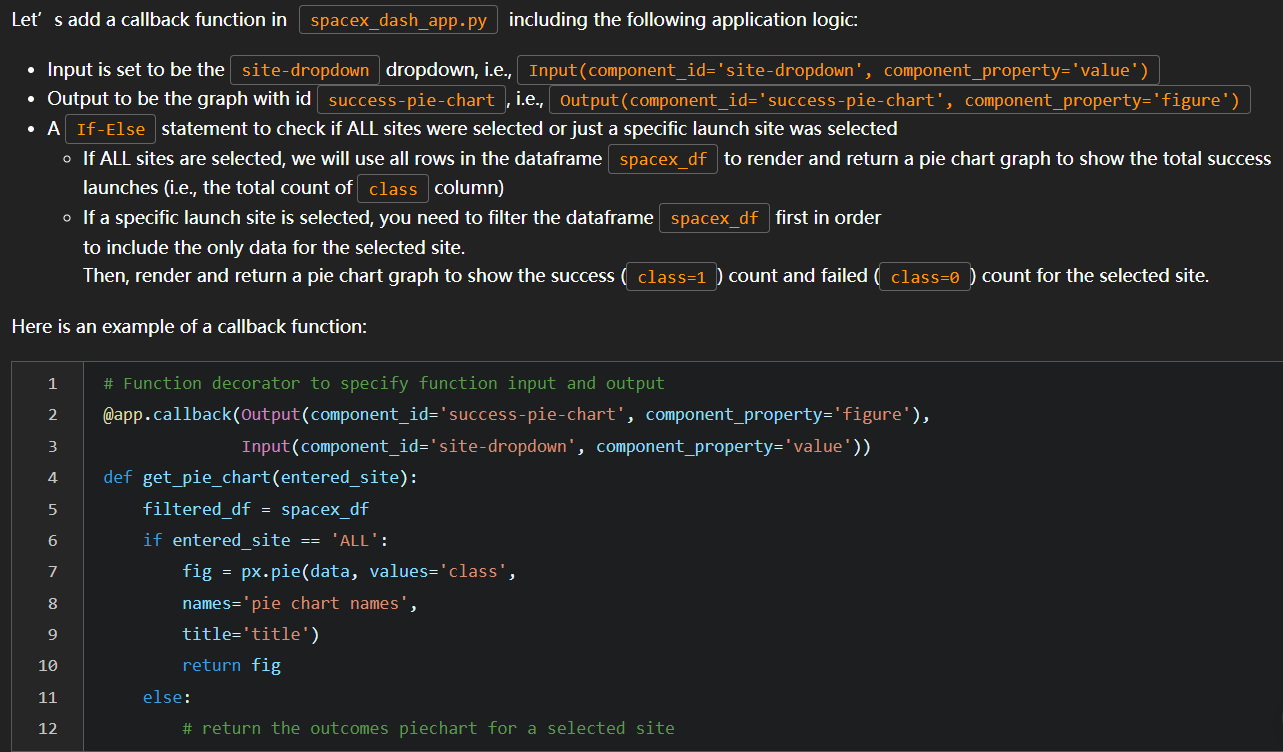

The rendered pie chart should look like the following screenshots:

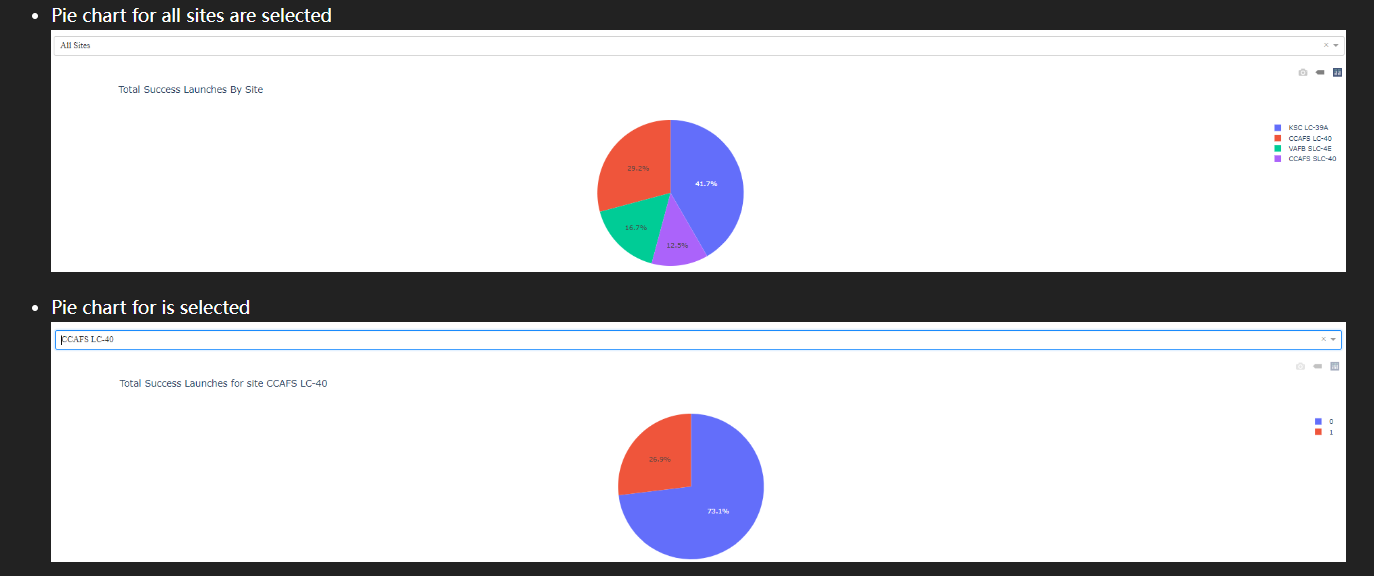

If you need more reference about dash callbacks and plotly pie charts, refer to the Plotly Dash Reference section towards
the end of this lab.

In [20]:
# Create a dash application
app = dash.Dash(__name__)

# Create an app layout
app.layout = html.Div(children=[html.H1('SpaceX Launch Records Dashboard',
                                        style={'textAlign': 'center', 'color': '#503D36',
                                               'font-size': 40}),
                                # TASK 1: Add a dropdown list to enable Launch Site selection
                                # The default select value is for ALL sites
                                # dcc.Dropdown(id='site-dropdown',...)
                                html.Div([
                                        # Create an division for adding dropdown helper text for report type
                                        html.Div(
                                                  [
                                                  html.H2('Launch Site:', style={'margin-right': '2em'}),
                                                  ]
                                                ),
                                        # Add a dropdown
                                        dcc.Dropdown(id='site-dropdown', 
                                                     options = sites_opt, 
                                                     placeholder='All Sites',
                                                     style={'textAlign': 'center', 'color': '#000000', 'font-size': 20, 'width':'80%', 'padding':'3px'}
                                                     )
                                            ], style={'display':'flex'}),

                                html.Br(),

                                # TASK 2: Add a pie chart to show the total successful launches count for all sites
                                # If a specific launch site was selected, show the Success vs. Failed counts for the site
                                html.Div(dcc.Graph(id='success-pie-chart')),
                                html.Br(),

                                html.P("Payload range (Kg):"),
                                # TASK 3: Add a slider to select payload range
                                #dcc.RangeSlider(id='payload-slider',...)

                                # TASK 4: Add a scatter chart to show the correlation between payload and launch success
                                html.Div(dcc.Graph(id='success-payload-scatter-chart')),
                                ])

# TASK 2:
# Add a callback function for `site-dropdown` as input, `success-pie-chart` as output

# TASK 4:
# Add a callback function for `site-dropdown` and `payload-slider` as inputs, `success-payload-scatter-chart` as output


# Function decorator to specify function input and output
@app.callback(Output(component_id='success-pie-chart', component_property='figure'),
              Input(component_id='site-dropdown', component_property='value'))
def get_pie_chart(entered_site):
    d = spacex_df
    if entered_site == 'All Sites':
        fig = px.pie(d, values='class', names='Launch Site', title='Total Successful Launches for All Sites')
        # fig.update_traces(textinfo='value') # shows counts instead of percentages
        return fig
    else:
        # return the outcomes piechart for a selected site
        data = d[d['Launch Site'] == entered_site]
        ttl = 'Launch Outcome for Selected Site'
        fig = px.pie(data, 
                     #values= 'class', 
                     names='class', 
                     # labels={0: "Gender", 1: "Smokes"}, # cannot make this work
                     title= ttl)
        # fig.update_traces(textinfo='value')
        return fig
         
# Run the app
if __name__ == '__main__':
    app.run_server()

## TASK 3: Add a Range Slider to Select Payload

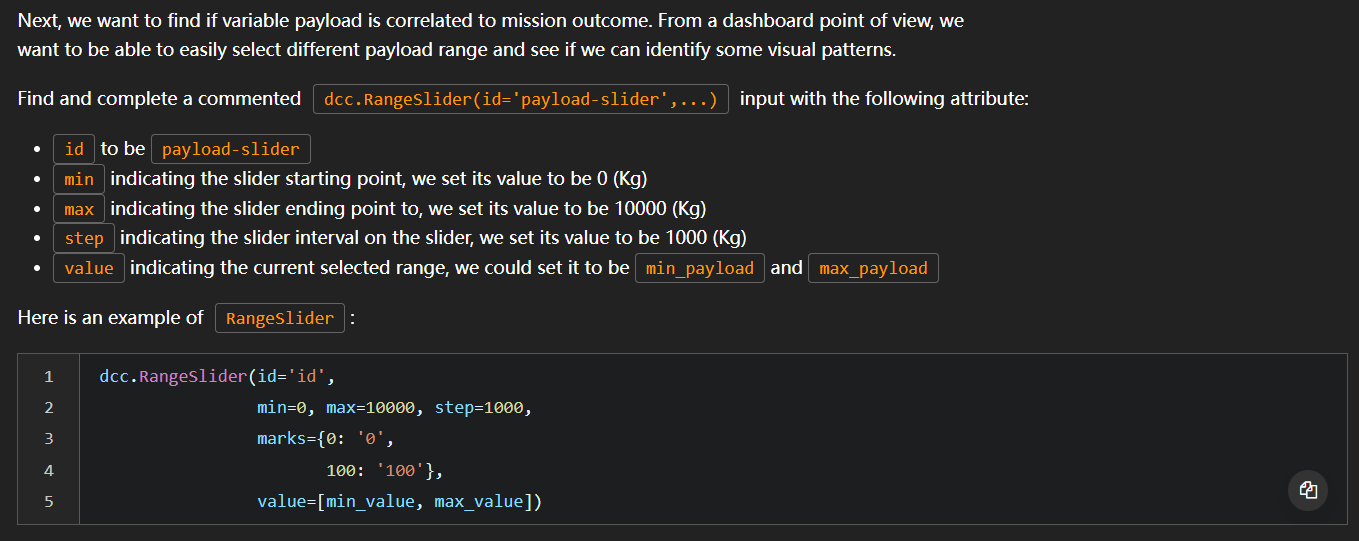

You completed payload range slider should be similar the following screenshot:

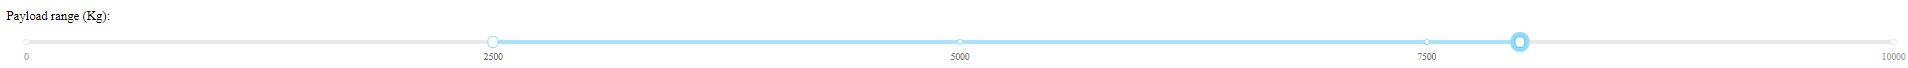

If you need more reference about range slider, refer to the Plotly Dash Reference towards
the end of this lab.

In [21]:
# Create a dash application
app = dash.Dash(__name__)

# Create an app layout
app.layout = html.Div(children=[html.H1('SpaceX Launch Records Dashboard',
                                        style={'textAlign': 'center', 'color': '#503D36',
                                               'font-size': 40}),
                                # TASK 1: Add a dropdown list to enable Launch Site selection
                                # The default select value is for ALL sites
                                # dcc.Dropdown(id='site-dropdown',...)
                                html.Div([
                                        # Create an division for adding dropdown helper text for report type
                                        html.Div(
                                                  [
                                                  html.H2('Launch Site:', style={'margin-right': '2em'}),
                                                  ]
                                                ),
                                        # Add a dropdown
                                        dcc.Dropdown(id='site-dropdown', 
                                                     options = sites_opt, 
                                                     placeholder='All Sites',
                                                     style={'textAlign': 'center', 'color': '#000000', 'font-size': 20, 'width':'80%', 'padding':'3px'}
                                                     )
                                            ], style={'display':'flex'}),

                                html.Br(),

                                # TASK 2: Add a pie chart to show the total successful launches count for all sites
                                # If a specific launch site was selected, show the Success vs. Failed counts for the site
                                html.Div(dcc.Graph(id='success-pie-chart')),
                                html.Br(),

                                html.P("Payload range (Kg):"),
                                # TASK 3: Add a slider to select payload range
                                #dcc.RangeSlider(id='payload-slider',...)
                                dcc.RangeSlider(id='payload-slider', min=0, max=10000, step=1000, 
                                                marks={0: '0', 2500: '2500', 5000: '5000', 
                                                       7500: '7500', 10000: '10000'}, value=[min_payload, max_payload]),

                                # TASK 4: Add a scatter chart to show the correlation between payload and launch success
                                html.Div(dcc.Graph(id='success-payload-scatter-chart')),
                                ])

# TASK 2:
# Add a callback function for `site-dropdown` as input, `success-pie-chart` as output

# TASK 4:
# Add a callback function for `site-dropdown` and `payload-slider` as inputs, `success-payload-scatter-chart` as output


# Function decorator to specify function input and output
@app.callback(Output(component_id='success-pie-chart', component_property='figure'),
              Input(component_id='site-dropdown', component_property='value'))
def get_pie_chart(entered_site):
    d = spacex_df
    if entered_site == 'All Sites':
        fig = px.pie(d, values='class', names='Launch Site', title='Total Number of Successful Launches for All Sites')
        fig.update_traces(textinfo='value') # shows counts instead of percentages
        return fig
    else:
        # return the outcomes piechart for a selected site
        data = d[d['Launch Site'] == entered_site]
        ttl = 'Launch Outcome for Selected Site'
        fig = px.pie(data, 
                     #values= 'class', 
                     names='class', 
                     # labels={0: "Gender", 1: "Smokes"}, # cannot make this work
                     title= ttl)
        # fig.update_traces(textinfo='value')
        return fig
         
# Run the app
if __name__ == '__main__':
    app.run_server()

## TASK 4: Add a callback function to render the success-payload-scatter-chart scatter plot

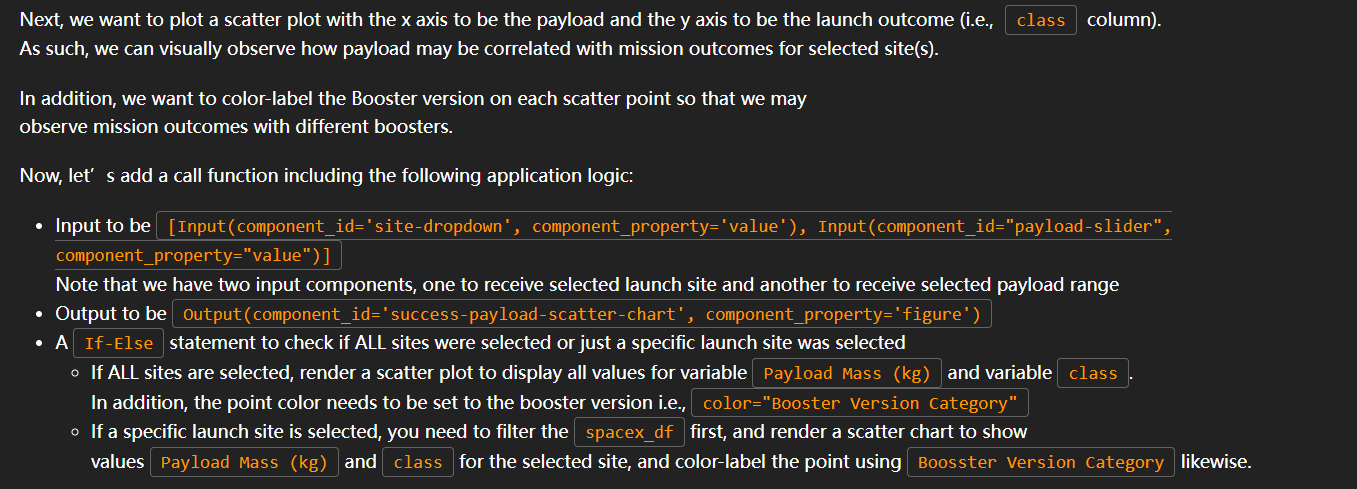

You rendered scatter point should look like the following screenshot:
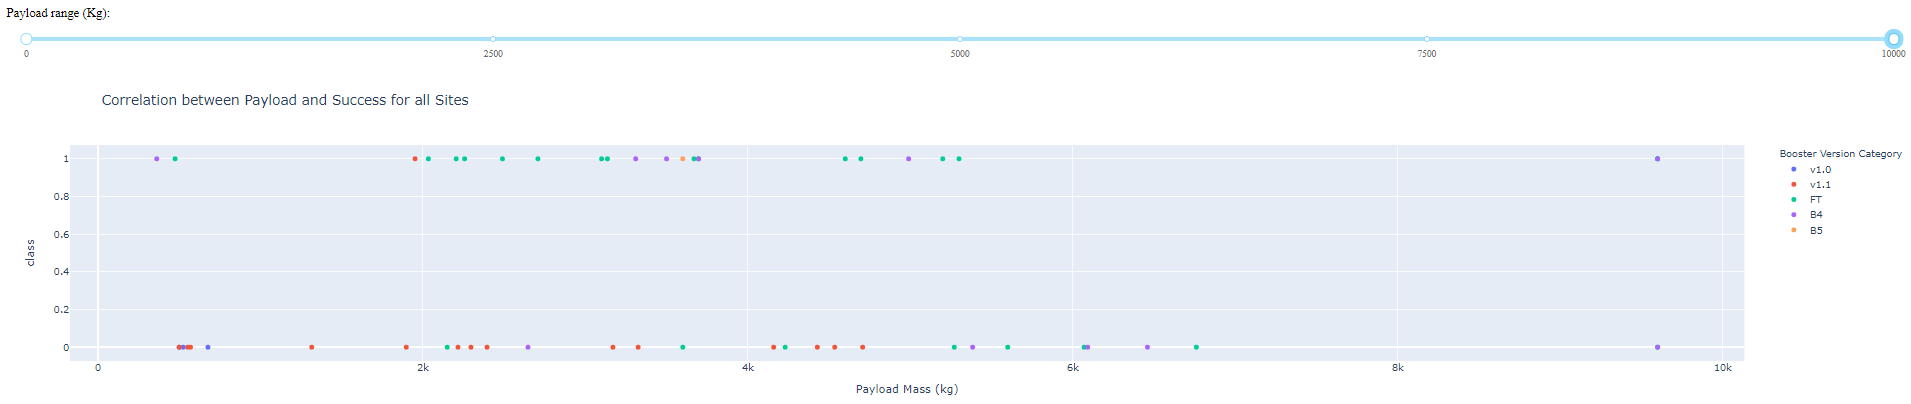

If you need more reference about dash callbacks and plotly scatter plots, refer to the Plotly Dash Reference towards
the end of this lab.

In [22]:
# Create a dash application
app = dash.Dash(__name__)

# Create an app layout
app.layout = html.Div(children=[html.H1('SpaceX Launch Records Dashboard',
                                        style={'textAlign': 'center', 'color': '#503D36',
                                               'font-size': 40}),
                                # TASK 1: Add a dropdown list to enable Launch Site selection
                                # The default select value is for ALL sites
                                # dcc.Dropdown(id='site-dropdown',...)
                                html.Div([
                                        # Create an division for adding dropdown helper text for report type
                                        html.Div(
                                                  [
                                                  html.H2('Launch Site:', style={'margin-right': '2em'}),
                                                  ]
                                                ),
                                        # Add a dropdown
                                        dcc.Dropdown(id='site-dropdown', 
                                                     options = sites_opt, 
                                                     placeholder='All Sites',
                                                     style={'textAlign': 'center', 'color': '#000000', 'font-size': 20, 'width':'80%', 'padding':'3px'}
                                                     )
                                            ], style={'display':'flex'}),

                                html.Br(),

                                # TASK 2: Add a pie chart to show the total successful launches count for all sites
                                # If a specific launch site was selected, show the Success vs. Failed counts for the site
                                html.Div(dcc.Graph(id='success-pie-chart')),
                                html.Br(),

                                html.P("Payload range (Kg):"),
                                # TASK 3: Add a slider to select payload range
                                #dcc.RangeSlider(id='payload-slider',...)
                                dcc.RangeSlider(id='payload-slider', min=0, max=10000, step=1000, 
                                                marks={0: '0', 2500: '2500', 5000: '5000', 
                                                       7500: '7500', 10000: '10000'}, value=[min_payload, max_payload]),
                                
                                # TASK 4: Add a scatter chart to show the correlation between payload and launch success
                                html.Div(dcc.Graph(id='success-payload-scatter-chart')),
                                ])

# TASK 2:
# Add a callback function for `site-dropdown` as input, `success-pie-chart` as output

# Function decorator to specify function input and output
@app.callback(Output(component_id='success-pie-chart', component_property='figure'),
              Input(component_id='site-dropdown', component_property='value'))
def get_pie_chart(entered_site):
    d = spacex_df
    if entered_site == 'All Sites':
        fig = px.pie(d, values='class', names='Launch Site', title='Total Number of Successful Launches for All Sites')
        fig.update_traces(textinfo='value') # shows counts instead of percentages
        return fig
    else:
        # return the outcomes piechart for a selected site
        data = d[d['Launch Site'] == entered_site]
        ttl = 'Launch Outcome for Selected Site'
        fig = px.pie(data, 
                     #values= 'class', 
                     names='class', 
                     # labels={0: "Gender", 1: "Smokes"}, # cannot make this work
                     title= ttl)
        # fig.update_traces(textinfo='value')
        return fig

    

# TASK 4:
# Add a callback function for `site-dropdown` and `payload-slider` as inputs, `success-payload-scatter-chart` as output    
@app.callback(Output(component_id='success-payload-scatter-chart', component_property='figure'),
              [Input(component_id='site-dropdown', component_property='value'),
               Input(component_id='payload-slider', component_property='value')])

def get_scatterchart(entered_site, sldr_payload):
    d = spacex_df
    if entered_site == 'All Sites':
        drange = d[(d['Payload Mass (kg)']>=sldr_payload[0])
        &(d['Payload Mass (kg)']<=sldr_payload[1])]
        fig = px.scatter(drange, x="Payload Mass (kg)", y="class", color="Booster Version Category")
        return fig
        # If ALL sites are selected, render a scatter plot to display all values for variable Payload Mass (kg) 
        # and variable class. In addition, the point color needs to be set to the booster version 
        # i.e., color="Booster Version Category"
    else:
        data = d[(d['Launch Site'] == entered_site)]
        filtered_data = data[(data['Payload Mass (kg)']>=sldr_payload[0])
        &(data['Payload Mass (kg)']<=sldr_payload[1])]
            #sx -- filter data with payload slider!
            #sx -- sldr_payload is a list with two components: min and max
        ttl = 'ttitle'
        fig = px.scatter(filtered_data, x="Payload Mass (kg)", y="class", color="Booster Version Category")
        return fig
        # If a specific launch site is selected, you need to filter the spacex_df first, 
        # and render a scatter chart to show values Payload Mass (kg) and class for the selected site, 
        # and color-label the point using Boosster Version Category likewise.
        
    
# Run the app
if __name__ == '__main__':
    app.run_server()

### Finding Insights Visually

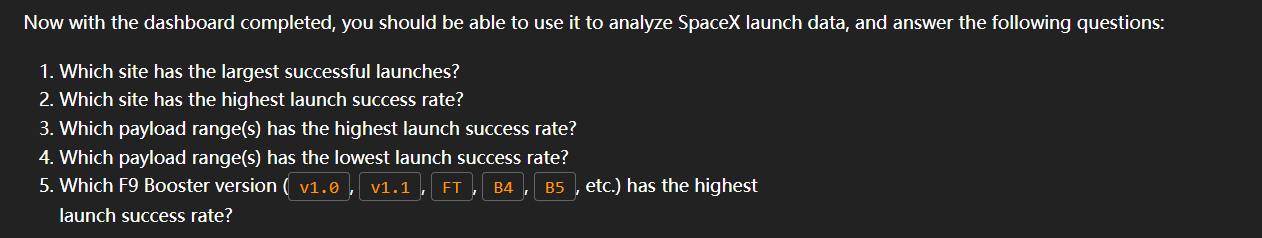

### Plotly Dash Reference


Dropdown (input) component
Refer [here](https://dash.plotly.com/dash-core-components/dropdown?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2023-01-01) for more details about dcc.Dropdown()

Range slider (input) component
Refer [here](https://dash.plotly.com/dash-core-components/rangeslider?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2023-01-01)] for more details about dcc.RangeSlider()

Pie chart (output) component
Refer [here](https://plotly.com/python/pie-charts/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2023-01-01) for more details about plotly pie charts

Scatter chart (output) component
Refer [here](https://plotly.com/python/line-and-scatter/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2023-01-01) for more details about plotly scatter charts